In [2]:
import pandas as pd
chipo = pd.read_csv('chipotle.tsv', sep='\t')
# chipo.head(10)

In [3]:
# 1. Which was the most-ordered item?
item_counts = chipo['item_name'].value_counts()
most_ordered_item = item_counts.idxmax()
print('most-ordered item:')
print(most_ordered_item)

most-ordered item:
Chicken Bowl


In [4]:
# 2. What was the most ordered item in the choice_description column?
import re
choice_frame = chipo['choice_description'].dropna().replace(r'[\[\]]', r'', regex=True)
choice_dict = {}
for i in range(len(choice_frame)):
    for choice in choice_frame.iloc[i].split(', '):
        if str(choice) in choice_dict:
            choice_dict[str(choice)] += 1
        else:
            choice_dict[str(choice)] = 1
# print(choice_dict)
v = list(choice_dict.values())
k = list(choice_dict.keys())
most_ordered_choice = k[v.index(max(v))]
print('most ordered item in the choice_description:')
print(most_ordered_choice)

most ordered item in the choice_description:
Rice


In [5]:
# 3. How much was the revenue for the period in the dataset?
price_frame = chipo['item_price'].replace(r'\$', r'', regex=True).astype(float)
# total_revenue = sum(chipo['quantity']*price_frame)
total_revenue = sum(price_frame)
print('revenue for the period:')
print(total_revenue)

revenue for the period:
34500.16000000046


In [6]:
# 4. What is the average revenue amount per order?
avg_revenue = sum(price_frame)/len(price_frame)
print('average revenue amount per order:')
print(avg_revenue)

average revenue amount per order:
7.464335785374397


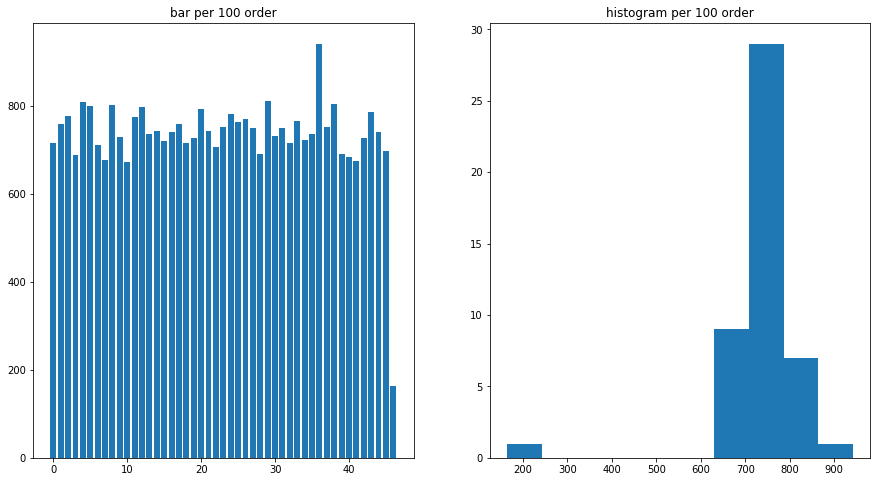

In [8]:
# 5. Plot the revenue amount per 100 order
import matplotlib.pyplot as plt
revenue_per_100 = []
for i in range(len(price_frame)):
    if (int(i/100)+1) > len(revenue_per_100):
        revenue_per_100.append(price_frame.iloc[i])
    else:
        revenue_per_100[int(i/100)] += price_frame.iloc[i]
# print(revenue_per_100)
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].set_title('bar per 100 order')
ax[0].bar(range(len(revenue_per_100)), revenue_per_100)
ax[1].set_title('histogram per 100 order')
ax[1].hist(revenue_per_100)
plt.show()